# Principal Component Analysis (PCA)
- PCA is an unsupervised technique that reduces the number of variables in a dataset while preserving as much important infomration as possible.
- Think of it as summarizing a long book into a short summary that still captures the main ideas

## Who do we need PCA?
- **Simplification:** Dealing with too many variables can be confusing. PCA helps by reducing the number.
- **Visualization:** It's hard to visualize data with many dimensions. PCA allows us to plot data in 2D or 3D.
- **Noise Reduction:** It filters out insignificant details, focusing on what's truly important.

In [118]:
# Imports


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_s = 101

In [119]:
# Imagine we have this dataset

df = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/demo-pca.csv")
df

,X1,X2,X3,X4
0,2.5,2.4,3.5,5.0
1,0.5,0.7,1.0,1.2
2,2.2,2.9,3.1,4.8
3,1.9,2.2,2.7,4.1
4,3.1,3.0,3.9,5.3
5,2.3,2.7,3.0,4.5
6,2.0,1.6,2.5,3.8
7,1.0,1.1,1.5,2.0
8,1.5,1.6,1.9,2.5
9,1.1,0.9,1.2,1.8


In [120]:
# SCALED DATA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.92627881,  0.61016865,  1.13669097,  1.05907275],
       [-1.7585873 , -1.506743  , -1.51912905, -1.62391155],
       [ 0.52354889,  1.23278973,  0.71175977,  0.91786305],
       [ 0.12081898,  0.36112022,  0.28682856,  0.4236291 ],
       [ 1.73173864,  1.35731394,  1.56162217,  1.2708873 ],
       [ 0.6577922 ,  0.9837413 ,  0.60552696,  0.7060485 ],
       [ 0.25506228, -0.38602507,  0.07436296,  0.21181455],
       [-1.08737078, -1.00864614, -0.98796505, -1.05907275],
       [-0.41615425, -0.38602507, -0.56303384, -0.7060485 ],
       [-0.95312747, -1.25769457, -1.30666345, -1.20028245]])

In [121]:
# Reconstruct the seed_data_scaled to a dataframe

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head(3)

,X1,X2,X3,X4
0,0.926279,0.610169,1.136691,1.059073
1,-1.758587,-1.506743,-1.519129,-1.623912
2,0.523549,1.232790,0.711760,0.917863


## Dimensionality Reduction via Correlational Analysis

In [122]:
# You are already familiar with correlational analysis

# Calculate the correlation matrix

correlation_matrix = df.corr()

# Display the correlation matrix

correlation_matrix

,X1,X2,X3,X4
X1,1.000000,0.925929,0.980732,0.967727
X2,0.925929,1.000000,0.950736,0.956571
X3,0.980732,0.950736,1.000000,0.988573
X4,0.967727,0.956571,0.988573,1.000000


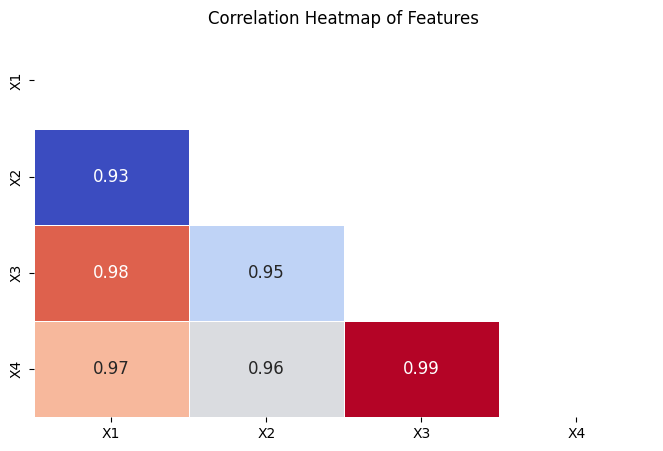

In [123]:
# Correlation in seaborns's heatmap

plt.figure(figsize = (8,5))

# Mask to crop the upper triangle

mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',
            linewidths = 0.5, fmt = '.2f', annot_kws={"size": 12}, cbar = False, mask = mask)
plt.title("Correlation Heatmap of Features")
plt.show()

In [124]:
# Analyze Correlational Data

correlation_matrix[correlation_matrix < 1].unstack().drop_duplicates().sort_values(ascending = False)

X3  X4    0.988573
X1  X3    0.980732
    X4    0.967727
X2  X4    0.956571
    X3    0.950736
X1  X2    0.925929
    X1         NaN
dtype: float64

In [125]:
# X3 and X4 are exceptionally highly correlated (0.988).
# X1 also shows high correlation with both X3 (0.980) and X4 (0.967)
# Keeping X1 alone could retain most of the information from the other two

# Suggested removals:
# You can remove X3 and X4 based on their high correlations with X1.
# This will leave you with X1 and X2 as the most independent variables

## Dimensionality Reduction Using PCA

In [126]:
from sklearn.decomposition import PCA

# Apply PCA

pca = PCA()
pca.fit(df_scaled)

# Extract the explained variance ration and components

explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Display the explained variance and components

explained_variance, components

(array([0.97136167, 0.01981919, 0.00661655, 0.00220259]),
 array([[ 0.49863368,  0.49318915,  0.50451339,  0.50358232],
        [-0.53833211,  0.81285384, -0.21785873, -0.04477426],
        [-0.62508888, -0.30980191,  0.25077219,  0.67111845],
        [-0.26613319,  0.00747417,  0.79694236, -0.5422178 ]]))

In [127]:
# Explanation:
# The first principal (PC0) component explains (97.13%) of the variance
# The second principal (PC1) component explains (1.98%) of the variance
# The remaining components (PC2 & PC3) explain very little variance (less than 1% each)

## Explained Variance Plot for each Principal Components

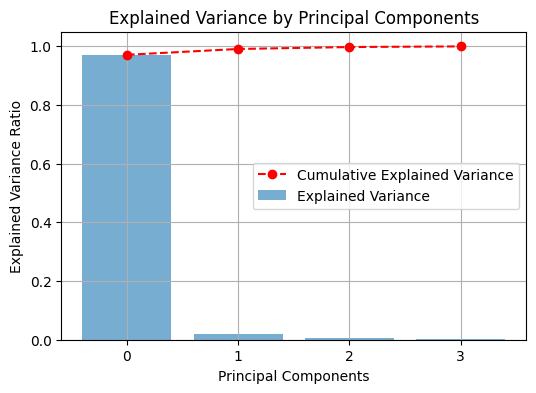

In [128]:
# Plot the explained variance of each principal component

plt.figure(figsize=(6, 4))

# Plot the cumulative explained variance

plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', label = 'Cumulative Explained Variance', color = 'red')

# Plot the individual explained variance for each component

plt.bar(range(0, len(explained_variance)), explained_variance, alpha = 0.6, label='Explained Variance')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(0, len(explained_variance)))
plt.grid(True)
plt.legend(loc = 'center right')
plt.show()

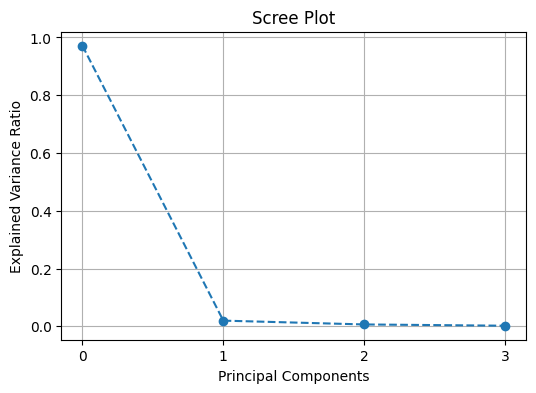

In [129]:
# Create a scree plot to visualize the explained variance of each principal component

plt.figure(figsize=(6, 4))

# Plot explained variance for each component

plt.plot(range(0, len(explained_variance)), explained_variance, marker='o', linestyle='--', label='Explained Variance')

# Add labels and title

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(0, len(explained_variance)))
plt.grid(True)

plt.show()

In [130]:
# PCA Variable Loadings

# Create a DataFrame for the PCA loadings

loadings_df = pd.DataFrame(pca.components_, columns=['X1', 'X2', 'X3', 'X4'], index = [f'PC{i}' for i in range(len(pca.components_))])
loadings_df

,X1,X2,X3,X4
PC0,0.498634,0.493189,0.504513,0.503582
PC1,-0.538332,0.812854,-0.217859,-0.044774
PC2,-0.625089,-0.309802,0.250772,0.671118
PC3,-0.266133,0.007474,0.796942,-0.542218


<Figure size 500x300 with 0 Axes>

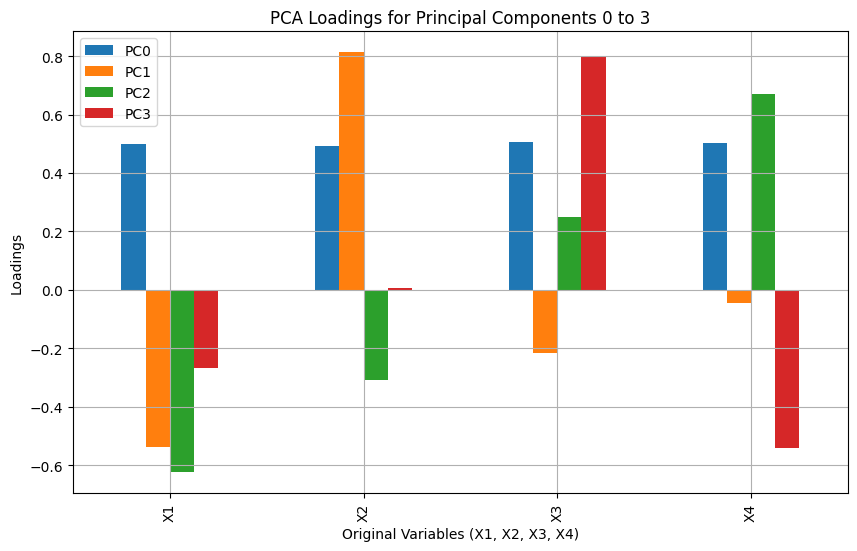

In [131]:
# Creating the PCA loadings DataFrame again

loadings_df = pd.DataFrame(pca.components_, columns=['X1', 'X2', 'X3', 'X4'], index=[f'PC{i}' for i in range(len(pca.components_))])

# Plotting the loadings for PC0 to PC3

plt.figure(figsize=(5, 3))

# Create a bar plot for the loadings of each principal component

loadings_df.T.plot(kind='bar', figsize=(10, 6))

plt.title('PCA Loadings for Principal Components 0 to 3')
plt.xlabel('Original Variables (X1, X2, X3, X4)')
plt.ylabel('Loadings')
plt.grid(True)
plt.legend()

plt.show()

In [132]:
# Explanation:

# PC0: All variables X1 to X4 have a balanced mix of all the original variables and captures the common variation among them

# PC1: X2 has a strong positive loading (0.812), contributing the most for PC1
#      X1 has aa strong negative loadind (0.538), contributing in the opposite direction to X2
#      X3 and X4 contribute less to PC1 with (0.218 and -0.045)
#      This suggests the PC1 differentiates primarily between X2 and X1, where they vary oppositely

# PC2: X1 (0.625) and X2 (0.310) contribute positively, while X4 (-0.671) contributes negatively.
#      X3 has a smaller negative contribution (-0.251)
#      PC2 separates variables in terms of differing relationships between X1, X2,, and X4

# PC3: X4 (0.542) and X3 (-0.797) have opposite contributions, with X3 being the most dominant
#      This component primarily captures the variation between X3 and X4, with smaller contributions from X1 and X2

# SUMMARY:
# PC0 explains the majority of the variance and is an even combination of all variables\
# PC1 primarily contrasts X1 and X2
# PC2 contrasts X1, X2, and X3
# PC3 contrasts X3 and X4

## Visualizing the Principal Components (PC0 and PC1)

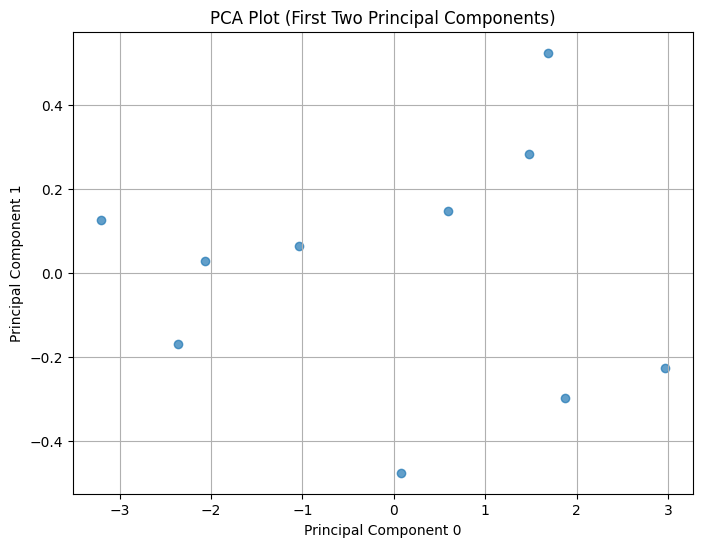

In [133]:
# Project the original data onto the first two principal components

pca_2d = PCA(n_components = 2)
data_pca_2d = pca_2d.fit_transform(df_scaled)

# Create a scatter plot of the first two principal components

plt.figure(figsize=(8, 6))

plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], alpha = 0.7)

plt.title('PCA Plot (First Two Principal Components)')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.grid(True)
plt.show()

## Visualizing the Principal Components (PC0, PC1, PC2)

In [136]:
# Project the original data onto the first three principal components

pca_3d = PCA(n_components = 3)
data_pca_3d = pca_3d.fit_transform(df_scaled)

# 3D Plot

import plotly.express as px

fig = px.scatter_3d(df_scaled, x = data_pca_3d[:,0], y = data_pca_3d[:,1], z = data_pca_3d[:,2], opacity = 0.8,
                    color_discrete_sequence =['red'], title = 'Scatter Plot of Principal Components (PC0, PC1 & PC2)')
fig.show()

In [137]:
# Two PCs

data_pca_2d

array([[ 1.8696085 , -0.29772495],
       [-3.20419426,  0.12560715],
       [ 1.69036957,  0.52407497],
       [ 0.59638596,  0.14704144],
       [ 2.9607714 , -0.22606874],
       [ 1.47421788,  0.28199509],
       [ 0.08098244, -0.47677464],
       [-2.07142493,  0.02814073],
       [-1.03750355,  0.06452188],
       [-2.359213  , -0.17081294]])

In [139]:
# Three PCs

data_pca_3d

array([[ 1.8696085 , -0.29772495,  0.22777575],
       [-3.20419426,  0.12560715,  0.09527291],
       [ 1.69036957,  0.52407497,  0.08529918],
       [ 0.59638596,  0.14704144,  0.1688356 ],
       [ 2.9607714 , -0.22606874, -0.2584617 ],
       [ 1.47421788,  0.28199509, -0.09025202],
       [ 0.08098244, -0.47677464,  0.12095552],
       [-2.07142493,  0.02814073,  0.03366646],
       [-1.03750355,  0.06452188, -0.23531071],
       [-2.359213  , -0.17081294, -0.14778099]])